Name : Pulkit K Golay

Registration Number : 20BCE11063

Build an ANN model for Drug classification. 

This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, 
including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to 
develop a model that can accurately predict the class or category of a given drug based on its features. 

Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification

Task 1: Read the dataset and do data pre-processing

Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

Task 3: Test the model with random data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/drug200.csv')

Task 1

In [ ]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
df.tail(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,M,HIGH,HIGH,18.991,DrugY
191,23,M,HIGH,HIGH,8.011,drugA
192,72,M,LOW,HIGH,16.310,DrugY
193,72,M,LOW,HIGH,6.769,drugC
194,46,F,HIGH,HIGH,34.686,DrugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<ipython-input-290-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

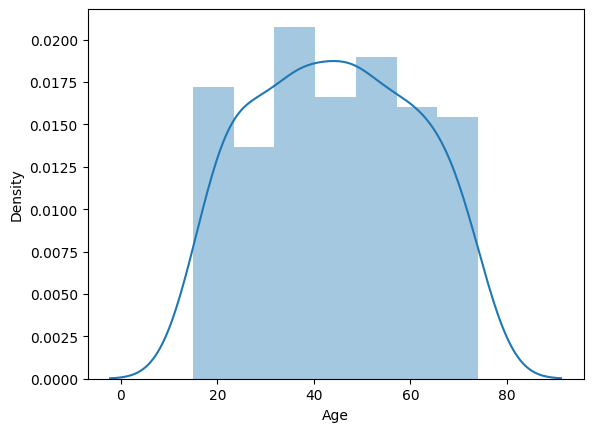

In [ ]:
sns.distplot(df.Age)

Kind of Normal Distribution

<ipython-input-291-fda53b94c691>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_to_K)


<Axes: xlabel='Na_to_K', ylabel='Density'>

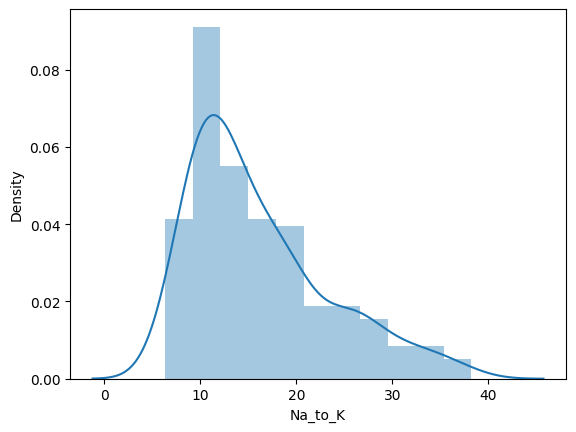

In [ ]:
sns.distplot(df.Na_to_K)

Right Skewed

<ipython-input-292-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

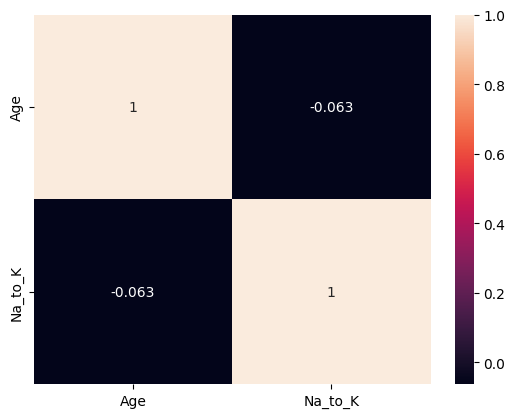

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: >

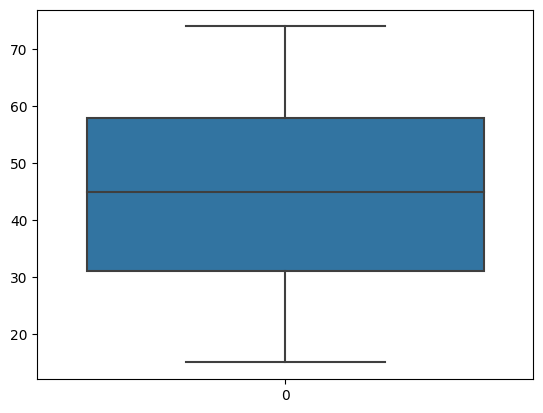

In [ ]:
sns.boxplot(df.Age)

No outliers here

<Axes: >

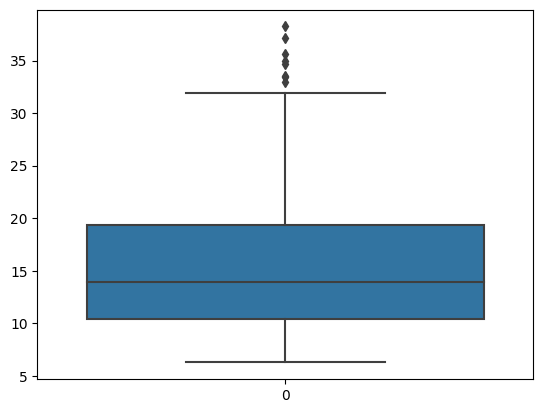

In [ ]:
sns.boxplot(df.Na_to_K)

Outliers in Na_to_K

In [ ]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
IQR = q3 - q1
IQR

8.9345

In [ ]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [ ]:
median = df.Na_to_K.median()
median

13.9365

<Axes: >

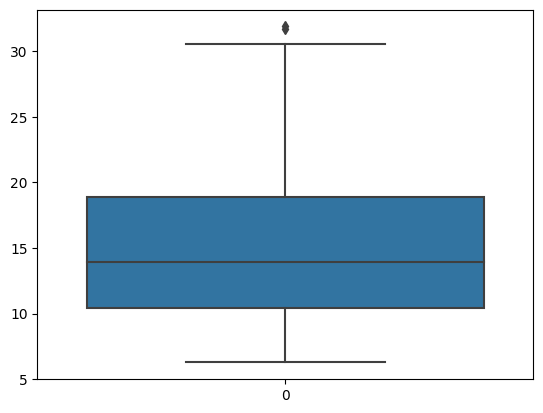

In [ ]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,median,df['Na_to_K'])
sns.boxplot(df.Na_to_K)

In [ ]:
df.shape

(200, 6)

In [ ]:
df.Na_to_K.median()

13.93575

In [ ]:
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Task 2

In [ ]:
x = df.iloc[:, 0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [ ]:
y = pd.get_dummies(df.iloc[:,5:]).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [ ]:
x.shape, y.shape

((200, 5), (200, 5))

In [ ]:
xtrain.shape, xtest.shape

((160, 5), (40, 5))

In [ ]:
ytrain.shape, ytest.shape

((160, 5), (40, 5))

In [ ]:
le = LabelEncoder()

In [ ]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtrain['Sex']

77     0
47     1
94     1
14     0
41     0
      ..
3      0
130    0
134    0
155    1
75     1
Name: Sex, Length: 160, dtype: int64

In [ ]:
xtest['Sex'] = le.transform(xtest['Sex'])
xtest['Sex']

23     0
182    0
172    0
21     1
63     1
11     0
61     1
32     1
164    1
7      1
95     1
173    0
132    1
120    1
98     1
138    1
31     1
16     1
181    0
85     1
185    0
166    0
101    0
129    0
113    0
51     1
167    0
88     0
108    1
136    0
29     1
183    0
152    1
93     0
189    1
139    0
179    0
55     0
1      1
5      0
Name: Sex, dtype: int64

In [ ]:
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtrain['BP']

77     0
47     1
94     1
14     2
41     0
      ..
3      2
130    2
134    0
155    1
75     1
Name: BP, Length: 160, dtype: int64

In [ ]:
xtest['BP'] = le.transform(xtest['BP'])
xtest['BP']

23     1
182    1
172    2
21     2
63     1
11     0
61     0
32     1
164    0
7      1
95     1
173    1
132    1
120    2
98     0
138    0
31     0
16     1
181    2
85     0
185    2
166    1
101    0
129    2
113    1
51     2
167    2
88     0
108    0
136    0
29     1
183    0
152    2
93     1
189    0
139    2
179    2
55     1
1      1
5      2
Name: BP, dtype: int64

In [ ]:
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtrain['Cholesterol']

77     1
47     0
94     0
14     0
41     1
      ..
3      0
130    0
134    0
155    0
75     1
Name: Cholesterol, Length: 160, dtype: int64

In [ ]:
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])
xtest['Cholesterol']

23     0
182    1
172    1
21     0
63     1
11     1
61     1
32     1
164    1
7      0
95     1
173    1
132    1
120    0
98     1
138    1
31     0
16     1
181    0
85     0
185    1
166    0
101    0
129    0
113    1
51     1
167    0
88     1
108    1
136    0
29     0
183    1
152    1
93     1
189    1
139    0
179    0
55     0
1      0
5      0
Name: Cholesterol, dtype: int64

In [ ]:
# Initializing the seq model
model = Sequential()
# Adding the input layer to the model
model.add(Dense(8,input_dim=5,activation='relu'))
# Adding the 1st hidden layer to the model
model.add(Dense(64,activation='relu'))
# Adding the 2nd hidden layer to the model
model.add(Dense(128,activation='relu'))
# Adding the 3rd hidden layer to the model
model.add(Dense(128,activation='relu'))
# Adding the 4th hidden layer to the model
model.add(Dense(64,activation='relu'))
# Adding the 5th hidden layer to the model
model.add(Dense(32,activation='relu'))
# Adding output layer
model.add(Dense(5,activation='softmax'))

In [ ]:
# Compiling the skeleton with loss and gradient decent


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 8)                 48        
                                                                 
 dense_64 (Dense)            (None, 64)                576       
                                                                 
 dense_65 (Dense)            (None, 128)               8320      
                                                                 
 dense_66 (Dense)            (None, 128)               16512     
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 5)                

In [ ]:
# Training the model

model.fit(xtrain,ytrain,epochs=30,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/30
32/32 [==============================] - 0s 6ms/step - loss: 0.0277 - accuracy: 0.9937 - val_loss: 0.2813 - val_accuracy: 0.8500
Epoch 2/30
32/32 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9875 - val_loss: 0.2873 - val_accuracy: 0.8250
Epoch 3/30
32/32 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9688 - val_loss: 0.2500 - val_accuracy: 0.8750
Epoch 4/30
32/32 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9500 - val_loss: 0.3920 - val_accuracy: 0.8750
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0993 - accuracy: 0.9625 - val_loss: 0.4919 - val_accuracy: 0.8500
Epoch 6/30
32/32 [==============================] - 0s 5ms/step - loss: 0.1455 - accuracy: 0.9312 - val_loss: 0.3362 - val_accuracy: 0.8750
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.0284 - accuracy: 0.9937 - val_loss: 0.2801 - val_accuracy: 0.9000
Epoch 8/30
32/32 [==

Task 3

In [ ]:
# Define the shape of the input data based on the model architecture
batch_size = 15

random_data = [[np.random.randint(1, 80), np.random.randint(0, 1), np.random.randint(0, 2), np.random.randint(0, 1), np.random.uniform(0, 30)] for _ in range(batch_size)]

# Print the shape of the random input data
random_data

[[36, 0, 0, 0, 14.18221680935613],
 [67, 0, 0, 0, 6.123010059478026],
 [61, 0, 1, 0, 19.12656256660502],
 [51, 0, 1, 0, 0.4773568869525613],
 [17, 0, 1, 0, 21.0814615260735],
 [47, 0, 1, 0, 4.934198802614903],
 [65, 0, 0, 0, 22.46522770065602],
 [33, 0, 1, 0, 26.34573813320803],
 [27, 0, 0, 0, 24.111188823871593],
 [50, 0, 1, 0, 27.269709903321715],
 [18, 0, 1, 0, 9.240904081574756],
 [4, 0, 1, 0, 14.19479927758398],
 [11, 0, 0, 0, 5.0687231899542065],
 [57, 0, 1, 0, 1.120388651280112],
 [20, 0, 1, 0, 15.397906014205772]]

In [ ]:
model.predict(random_data)

1/1 [==============================] - 0s 46ms/step


array([[4.5267940e-03, 9.9547309e-01, 1.0132020e-07, 1.0705093e-08,
        3.4622418e-09],
       [1.0280919e-03, 2.4903016e-04, 9.9849331e-01, 2.2503086e-04,
        4.4039580e-06],
       [9.9993819e-01, 1.6665443e-07, 9.4905808e-09, 4.4574327e-11,
        6.1653242e-05],
       [5.2685464e-06, 1.3209247e-07, 1.9544666e-06, 7.0362382e-02,
        9.2963016e-01],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.7424523e-31],
       [9.6208685e-05, 3.6987411e-05, 1.2890941e-04, 2.2216742e-01,
        7.7757043e-01],
       [9.9999934e-01, 6.3357805e-07, 1.8610358e-11, 8.8872847e-18,
        2.0944484e-10],
       [9.9999994e-01, 1.9648102e-23, 6.8000975e-26, 2.2571997e-30,
        3.1656844e-17],
       [1.0000000e+00, 1.5682089e-26, 2.5461688e-29, 2.7985304e-38,
        2.6330637e-21],
       [1.0000000e+00, 9.8552648e-15, 9.2528496e-19, 7.9441759e-19,
        6.6556365e-11],
       [5.2299943e-05, 3.6302745e-07, 6.6404611e-09, 5.4445404e-01,
        4.55